# <img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFFY-15-M Cyber Security Analytics

# Portfolio Task 1:
## Conduct an investigation on a web application to identify malicious attack activity using Python data science libraries 
---

**Student Name:** Md Abdullah Al Faruk<br>
<b>Student ID:</b> 21064584<br>
<b>Module Instructor:</b> Dr Phil Legg

#### Provided Materials:
A personalized data set of IIS web server.

#### Goals:
To seek out any malicious or suspicious activity in the organisation's web server by analyzing the provided log/data set as a cyber security analyst to .


#### Step 1:
At the very beginning all required libraries are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#pd.set_option('display.max_rows', 10000)

#### Step 2:
After importing the libraries provided data set will be loaded. (This portion is provided)

In [2]:
data_file = 'm2-faruk'
data_path = './'
data = pd.read_csv(data_path + data_file, delim_whitespace=True)
#data.to_csv('out.csv')
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df
data.head(10)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-01-01,00:31:00,171.18.131.237,GET,slyectlh.css,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,20
1,2022-01-01,00:31:00,171.18.131.237,GET,vnkkdkfj.css,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,20
2,2022-01-01,00:31:00,171.18.131.237,GET,footer.css,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,28
3,2022-01-01,00:31:00,171.18.131.237,GET,index.aspx,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,22
4,2022-01-01,00:31:08,171.18.131.237,GET,zvydmxpx.js,v=165908,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,26
5,2022-01-01,00:31:08,171.18.131.237,GET,index.aspx,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,25
6,2022-01-01,00:31:37,171.18.131.237,GET,zolsscvv.css,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,404,0,0,25
7,2022-01-01,00:31:37,171.18.131.237,GET,index.aspx,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,301,0,0,23
8,2022-01-01,00:31:51,171.18.131.237,GET,main.css,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,22
9,2022-01-01,00:31:51,171.18.131.237,GET,template.css,v=wktyqdhm,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,23


#### Step 3:
Now it is checked how many different methods are there in the 'cs-method' column.

In [3]:
data['cs-method'].unique()

array(['GET', 'POST'], dtype=object)

---
<b>Observation:</b> It is observed that there are two unique values in the 'cs-method' column. We know that, 'GET' method is used to request data from a specified resource whereas 'POST' method sends data to a server to create or update a resource. 

---

#### Step 4:
The quantity of occurances of each method if checked is any abnormality is present or not.

In [4]:
data['cs-method'].value_counts()

GET     66839
POST     3301
Name: cs-method, dtype: int64

---
<b>Observation:</b> From here no conclusion can be derived. Further analysis is required.

---

#### Step 5:
The unique client usernames from the 'cs-username' column is checked and counted. As usernames started with '-' is considered to be unauthenticated users (Whims, 2019).

In [5]:
data['cs-username'].value_counts().rename_axis('Cient Username').reset_index(name='Counts').head(10)

,Cient Username,Counts
0,-,27622
1,vx217925,125
2,uj684034,102
3,ie548957,93
4,mq188577,92
5,vc187040,90
6,se919356,89
7,go819591,89
8,sn166604,89
9,gn510728,88


---
<b>Observation:</b> From here we can see there are significant amount of anonymous user activity in the web server. From here it can be derived that anonymous access is allowed in the IIS server. Further inspection is required.
As the data set presents, it is a bank's web server. The anonymous activities might be done on the low-security contents such as public webpages of the server.

---

#### Step 6:
Finding out what are the contents that are been requested by anonymous users.

In [6]:
data.loc[data['cs-username'] == '-'].head(10)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-01-01,00:31:00,171.18.131.237,GET,slyectlh.css,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,20
1,2022-01-01,00:31:00,171.18.131.237,GET,vnkkdkfj.css,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,20
2,2022-01-01,00:31:00,171.18.131.237,GET,footer.css,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,28
3,2022-01-01,00:31:00,171.18.131.237,GET,index.aspx,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,22
4,2022-01-01,00:31:08,171.18.131.237,GET,zvydmxpx.js,v=165908,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,26
5,2022-01-01,00:31:08,171.18.131.237,GET,index.aspx,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,25
6,2022-01-01,00:31:37,171.18.131.237,GET,zolsscvv.css,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,404,0,0,25
7,2022-01-01,00:31:37,171.18.131.237,GET,index.aspx,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,301,0,0,23
8,2022-01-01,00:31:51,171.18.131.237,GET,main.css,-,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,22
9,2022-01-01,00:31:51,171.18.131.237,GET,template.css,v=wktyqdhm,443,-,45.140.21.225,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,23


---
<b>Observation: </b>No significant information could be acquired.

---

#### Step 7: 
For better understanding the required data are brought into a new dataframe.

In [7]:
anonymousUser = pd.DataFrame()
anonymousUser['IP'] = data['c-ip']
anonymousUser['Last Visited Site'] = data['cs(Referer)']
anonymousUser['URI Stem'] = data['cs-uri-stem']
anonymousUser['URI Query'] = data['cs-uri-query']
anonymousUser['HTTP Code'] = data['sc-status']

In [8]:
anonymousUser.head()  #New dataframe

,IP,Last Visited Site,URI Stem,URI Query,HTTP Code
0,45.140.21.225,-,slyectlh.css,-,200
1,45.140.21.225,-,vnkkdkfj.css,-,200
2,45.140.21.225,-,footer.css,-,200
3,45.140.21.225,-,index.aspx,-,200
4,45.140.21.225,https://bankofpunk.local/index.aspx,zvydmxpx.js,v=165908,200


#### Step 8:
From the 'Status' column of the newly created dataframe it is inspected how many types of HTTP code is present in the log.

In [9]:
anonymousUser['HTTP Code'].value_counts().rename_axis('HTTP Code').reset_index(name='Counts')

,HTTP Code,Counts
0,200,58849
1,404,5750
2,301,4666
3,401,875


<AxesSubplot:title={'center':'HTTP Code In The Log'}, xlabel='HTTP Code'>

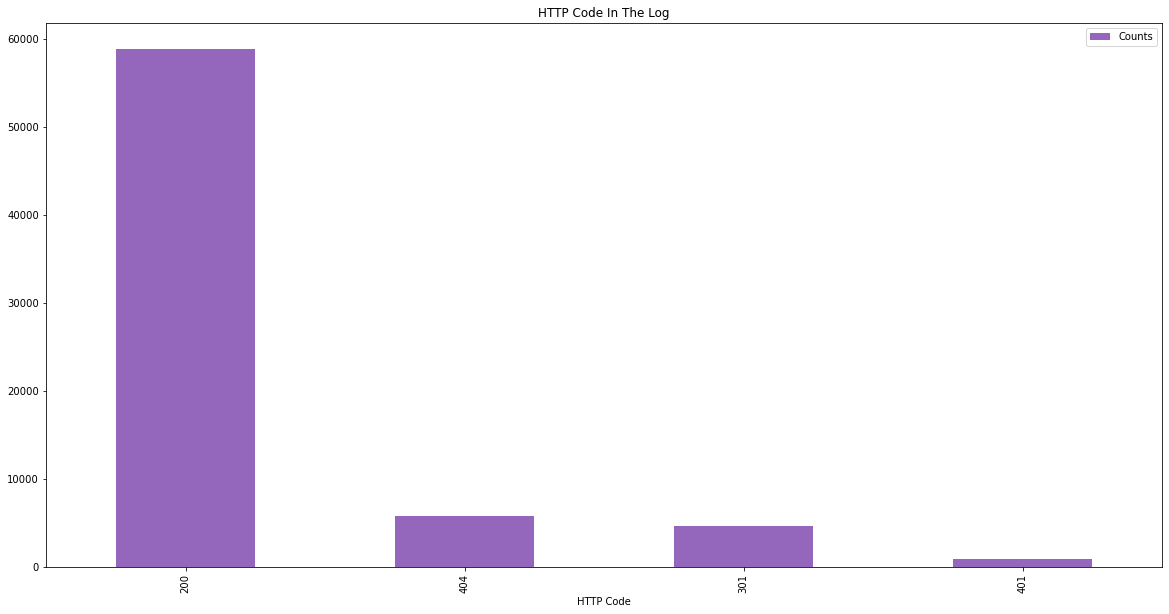

In [10]:
httpCodeBar = anonymousUser['HTTP Code'].value_counts().rename_axis('HTTP Code').reset_index(name='Counts')
httpCodeBar.plot(x='HTTP Code', y='Counts', kind='bar', title='HTTP Code In The Log', figsize=(20,10), color='tab:purple')

<b>Observation: </b>From the result and bar chart it is observed that, there are 4 types of HTTP codes in the given log. Where,<br>
<ul>1. '200' defines a successful conversation between a client and the server (Yu, 2022).</ul>
<ul>2. '301' defines a the requested resource has been definitively moved to the URL given by the Location headers (Yu, 2022).</ul>
<ul>3. '401' defines an rejection to unauthorized access to a web resource (Yu, 2022).</ul>
<ul>4. '404' defines the requested content is not avialable (Yu, 2022).</ul>
It can be assumed that several failed login attempts have been made by clients as per the dataset.

---

#### Step 9:
Now, the all the unique client IP addresses will be inspected in order to find out the communication among the server and clients.

In [11]:
data['c-ip'].value_counts().rename_axis('Client IP').reset_index(name='Counts').head(10)

,Client IP,Counts
0,103.140.134.39,275
1,195.212.74.214,236
2,64.225.172.42,231
3,91.239.156.70,153
4,46.102.116.177,140
5,91.136.34.225,134
6,206.24.173.8,134
7,143.210.93.159,133
8,54.182.244.144,133
9,193.24.31.0,133


<AxesSubplot:title={'center':'Communication Between Server And Individual Client IPs'}, xlabel='Client IP'>

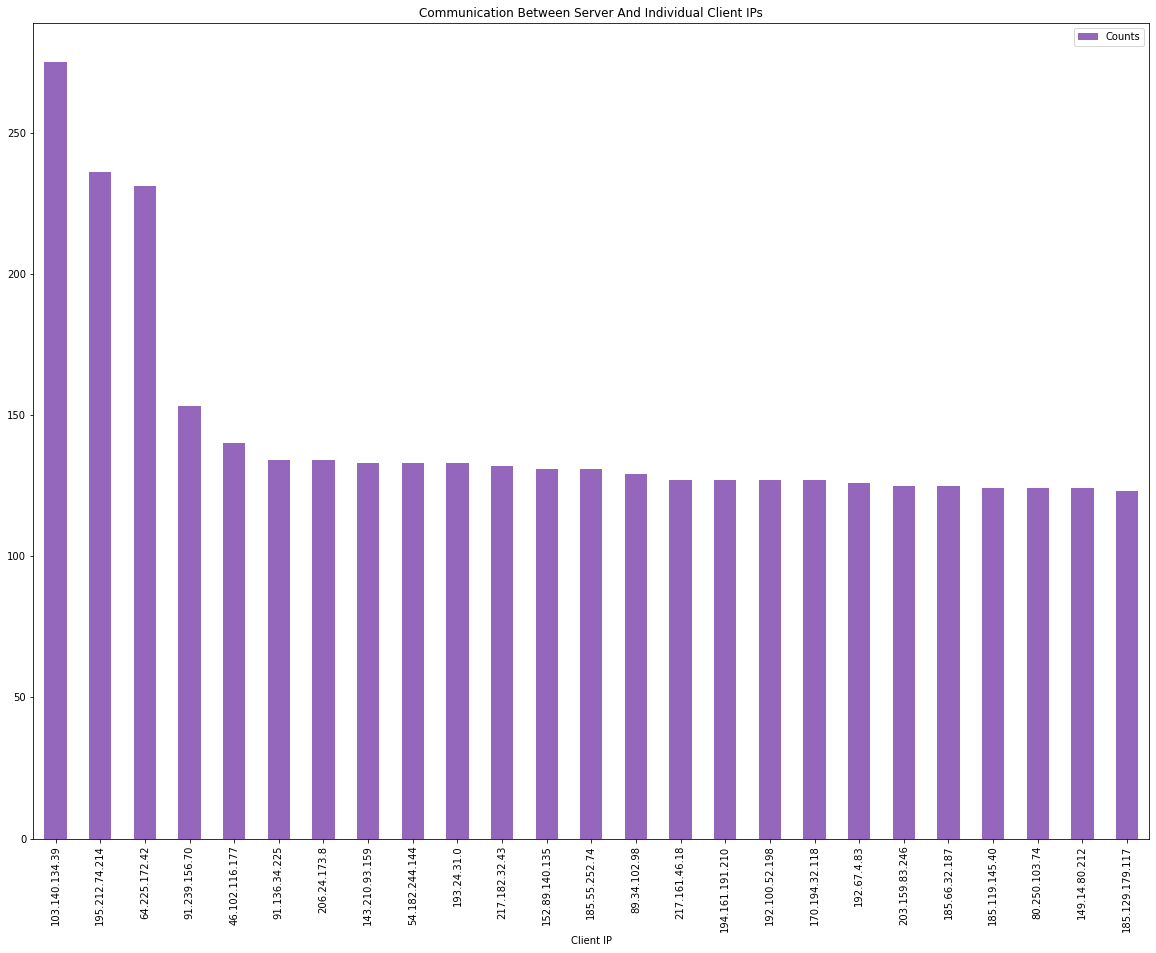

In [12]:
clientIPbar = data['c-ip'].value_counts().rename_axis('Client IP').reset_index(name='Counts').head(25)
clientIPbar.plot(x='Client IP', y='Counts', kind='bar', figsize=(20,15), title="Communication Between Server And Individual Client IPs", color='tab:purple')


<b>Observation: </b>From the above output and bar chart it can be seen that the first three IP addresses <b>103.140.134.39</b>, <b>195.212.74.214</b> and <b>64.225.172.42</b> have more amount of communications with the web server than the rest of the client IPs which seems to be unsual and suspicious.

---

#### Step 10:
To dig further deep now from the newly created dataframe 'anonymousUser' the <b>HTTP code 401</b> is searched and counted. The result is added as a new column in the dataframe. HTTP Code 401 means "Access Denied".

In [13]:
anonymousUser.loc[anonymousUser['HTTP Code'] == 401].value_counts().reset_index(name='Counts').head(10)

,IP,Last Visited Site,URI Stem,URI Query,HTTP Code,Counts
0,103.140.134.39,https://bankofpunk.local/login.aspx,login.aspx,-,401,203
1,195.212.74.214,https://bankofpunk.local/login.aspx,login.aspx,-,401,161
2,64.225.172.42,https://bankofpunk.local/login.aspx,login.aspx,-,401,161
3,185.18.48.126,https://bankofpunk.local/login.aspx,login.aspx,-,401,4
4,143.210.93.159,https://bankofpunk.local/login.aspx,login.aspx,-,401,4
5,204.138.27.89,https://bankofpunk.local/login.aspx,login.aspx,-,401,3
6,77.55.165.196,https://bankofpunk.local/login.aspx,login.aspx,-,401,3
7,169.50.132.167,https://bankofpunk.local/login.aspx,login.aspx,-,401,3
8,109.73.112.76,https://bankofpunk.local/login.aspx,login.aspx,-,401,2
9,194.147.140.43,https://bankofpunk.local/login.aspx,login.aspx,-,401,2


<AxesSubplot:title={'center':'HTTP Code 401 For Different IPs'}, xlabel='IP'>

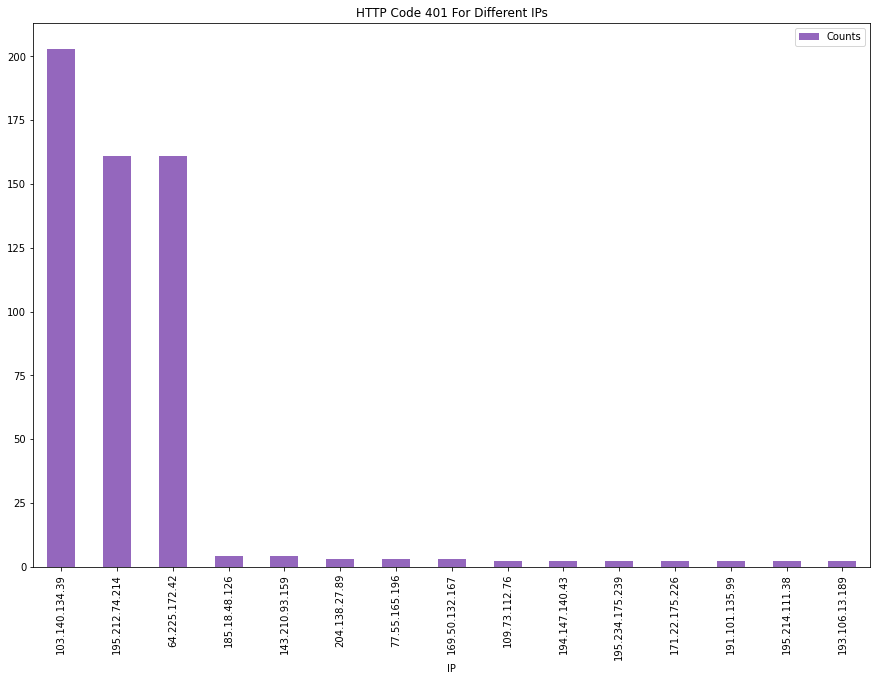

In [14]:
ipBar_1 = anonymousUser.loc[anonymousUser.loc[:,'HTTP Code'] == 401].value_counts().reset_index(name='Counts').head(15)
ipBar_1.plot(x='IP',y='Counts',kind='bar', figsize=(15,10), title="HTTP Code 401 For Different IPs", color='tab:purple')


<b>Observation: </b>From the output and bar chart it can be observed that same IP addresses have significant amount of <b>HTTP code 401</b> counts than rest of the IPs. Suspicious activity is assumed from this output.

---

#### Step 11:
Now the suspicious IPs will be analyzed more deeply. For this, individual output for the IPs is generated for analysis.

In [15]:
data[data['c-ip'].str.contains('103.140.134.39')].head(10)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
35261,2022-01-16,08:13:00,171.18.131.237,GET,favico.ico,-,443,-,103.140.134.39,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,-,200,0,0,28
35262,2022-01-16,08:13:00,171.18.131.237,GET,footer.css,-,443,-,103.140.134.39,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,-,200,0,0,24
35263,2022-01-16,08:13:00,171.18.131.237,GET,main.css,-,443,-,103.140.134.39,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,-,200,0,0,27
35264,2022-01-16,08:13:00,171.18.131.237,GET,index.aspx,-,443,-,103.140.134.39,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,-,301,0,0,26
35271,2022-01-16,08:13:17,171.18.131.237,POST,login.aspx,-,443,-,103.140.134.39,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,401,0,0,20
35272,2022-01-16,08:13:20,171.18.131.237,POST,login.aspx,-,443,-,103.140.134.39,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,25
35273,2022-01-16,08:13:22,171.18.131.237,POST,login.aspx,-,443,-,103.140.134.39,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,26
35274,2022-01-16,08:13:24,171.18.131.237,POST,login.aspx,-,443,-,103.140.134.39,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,26
35275,2022-01-16,08:13:25,171.18.131.237,POST,login.aspx,-,443,-,103.140.134.39,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,28
35276,2022-01-16,08:13:26,171.18.131.237,POST,login.aspx,-,443,-,103.140.134.39,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,22


In [16]:
data[data['c-ip'].str.contains('195.212.74.214')].head(10)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
12995,2022-01-06,18:57:00,171.18.131.237,GET,favico.ico,-,443,-,195.212.74.214,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,-,200,0,0,21
12996,2022-01-06,18:57:00,171.18.131.237,GET,index.aspx,-,443,-,195.212.74.214,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,-,301,0,0,27
13002,2022-01-06,18:57:21,171.18.131.237,POST,login.aspx,-,443,-,195.212.74.214,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,401,0,0,26
13003,2022-01-06,18:57:23,171.18.131.237,POST,login.aspx,-,443,-,195.212.74.214,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,28
13008,2022-01-06,18:57:25,171.18.131.237,POST,login.aspx,-,443,-,195.212.74.214,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,21
13009,2022-01-06,18:57:27,171.18.131.237,POST,login.aspx,-,443,-,195.212.74.214,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,20
13010,2022-01-06,18:57:29,171.18.131.237,POST,login.aspx,-,443,-,195.212.74.214,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,30
13011,2022-01-06,18:57:31,171.18.131.237,POST,login.aspx,-,443,-,195.212.74.214,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,29
13012,2022-01-06,18:57:34,171.18.131.237,POST,login.aspx,-,443,-,195.212.74.214,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,24
13013,2022-01-06,18:57:35,171.18.131.237,POST,login.aspx,-,443,-,195.212.74.214,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,20


In [17]:
data[data['c-ip'].str.contains('64.225.172.42')].head(10)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
21098,2022-01-10,08:58:00,171.18.131.237,GET,yresykla.css,-,443,-,64.225.172.42,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,-,200,0,0,22
21099,2022-01-10,08:58:00,171.18.131.237,GET,favico.ico,-,443,-,64.225.172.42,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,-,200,0,0,22
21100,2022-01-10,08:58:00,171.18.131.237,GET,index.aspx,-,443,-,64.225.172.42,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,-,301,0,0,25
21104,2022-01-10,08:58:09,171.18.131.237,POST,login.aspx,-,443,-,64.225.172.42,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,401,0,0,30
21105,2022-01-10,08:58:10,171.18.131.237,POST,login.aspx,-,443,-,64.225.172.42,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,26
21106,2022-01-10,08:58:12,171.18.131.237,POST,login.aspx,-,443,-,64.225.172.42,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,29
21107,2022-01-10,08:58:15,171.18.131.237,POST,login.aspx,-,443,-,64.225.172.42,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,24
21108,2022-01-10,08:58:18,171.18.131.237,POST,login.aspx,-,443,-,64.225.172.42,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,30
21109,2022-01-10,08:58:20,171.18.131.237,POST,login.aspx,-,443,-,64.225.172.42,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,28
21110,2022-01-10,08:58:21,171.18.131.237,POST,login.aspx,-,443,-,64.225.172.42,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,28


<b>Observation: </b>From the above outputs it is observed that all the suspected IPs have same nature of activity.<br>
    1. The are continuously trying to login to the server using https://bankofpunk.local/login.aspx.<br>
    2. After lots of wrong attempts (probable brute force attack) they were successful to login.<br>
    3. After logging in they have made several transactions.<br> 
    4. All these transfers and transactions were made in a very small period of time which is extremely suspicious.
    
---

#### Step 12:
For comparing with suspected IPs, three other unsuspicious IPs are analyzed. 

In [18]:
data[data['c-ip'].str.contains('91.239.156.70')].head(10)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
19776,2022-01-09,18:42:00,171.18.131.237,GET,qqyikhbc.js,v=938071,443,-,91.239.156.70,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,30
19777,2022-01-09,18:42:00,171.18.131.237,GET,index.aspx,-,443,-,91.239.156.70,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,26
19783,2022-01-09,18:42:17,171.18.131.237,GET,mvfztimc.css,-,443,-,91.239.156.70,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,20
19784,2022-01-09,18:42:17,171.18.131.237,GET,template.css,v=ipeiinus,443,-,91.239.156.70,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,25
19785,2022-01-09,18:42:17,171.18.131.237,GET,index.aspx,-,443,-,91.239.156.70,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,29
19786,2022-01-09,18:42:44,171.18.131.237,GET,lohxjatd.css,-,443,-,91.239.156.70,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,21
19787,2022-01-09,18:42:44,171.18.131.237,GET,index.aspx,-,443,-,91.239.156.70,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,301,0,0,23
19792,2022-01-09,18:42:54,171.18.131.237,GET,wprnholx.css,-,443,-,91.239.156.70,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,28
19793,2022-01-09,18:42:54,171.18.131.237,GET,main.css,-,443,-,91.239.156.70,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,29
19794,2022-01-09,18:42:54,171.18.131.237,GET,main.css,-,443,-,91.239.156.70,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,27


In [19]:
data[data['c-ip'].str.contains('185.18.48.126')].head(10)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
54819,2022-01-24,10:54:00,171.18.131.237,GET,favico.ico,-,443,-,185.18.48.126,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,-,200,0,0,21
54820,2022-01-24,10:54:00,171.18.131.237,GET,index.aspx,-,443,-,185.18.48.126,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,-,200,0,0,26
54821,2022-01-24,10:54:03,171.18.131.237,GET,bawcaeqd.css,-,443,-,185.18.48.126,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,https://bankofpunk.local/index.aspx,200,0,0,29
54822,2022-01-24,10:54:03,171.18.131.237,GET,footer.css,-,443,-,185.18.48.126,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,https://bankofpunk.local/index.aspx,200,0,0,22
54823,2022-01-24,10:54:03,171.18.131.237,GET,favico.ico,-,443,-,185.18.48.126,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,https://bankofpunk.local/index.aspx,200,0,0,26
54824,2022-01-24,10:54:03,171.18.131.237,GET,index.aspx,-,443,-,185.18.48.126,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,https://bankofpunk.local/index.aspx,200,0,0,25
54832,2022-01-24,10:54:32,171.18.131.237,GET,favico.ico,-,443,-,185.18.48.126,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,https://bankofpunk.local/index.aspx,200,0,0,25
54833,2022-01-24,10:54:32,171.18.131.237,POST,login.aspx,-,443,-,185.18.48.126,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,https://bankofpunk.local/index.aspx,401,0,0,23
54837,2022-01-24,10:54:39,171.18.131.237,GET,template.css,v=mmfalpce,443,-,185.18.48.126,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,https://bankofpunk.local/login.aspx,200,0,0,27
54838,2022-01-24,10:54:39,171.18.131.237,GET,template.css,v=rzbwdwau,443,-,185.18.48.126,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_0_1+like...,https://bankofpunk.local/login.aspx,200,0,0,29


<b>Observation: </b>These IPs have only necessary POST methods, transfers and transactions.

---

#### Step 13:
For making the suspicion more concrete the amount and type of activity by the suspicious IPs in terms of time is analyzed.

In [20]:
evidence = pd.DataFrame()
evidence['Date-Time'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%Y-%m-%d %H:%M:%S')
evidence['HTTP Method'] = data['cs-method']
evidence['Client IP'] = data['c-ip']
evidence['Referrer'] = data['cs(Referer)']
evidence['URI Stem'] = data['cs-uri-stem']

In [21]:
evidence.loc[evidence['Client IP'] == '103.140.134.39'].groupby(pd.Grouper(key='Date-Time', axis=0, 
                      freq='min'))['HTTP Method'].value_counts().reset_index(name='Counts').head(10)

,Date-Time,HTTP Method,Counts
0,2022-01-16 08:13:00,POST,24
1,2022-01-16 08:13:00,GET,4
2,2022-01-16 08:14:00,POST,33
3,2022-01-16 08:15:00,POST,28
4,2022-01-16 08:16:00,POST,30
5,2022-01-16 08:17:00,POST,30
6,2022-01-16 08:18:00,POST,29
7,2022-01-16 08:19:00,POST,30
8,2022-01-16 08:20:00,GET,12
9,2022-01-16 08:20:00,POST,1


<AxesSubplot:title={'center':'IP: 103.140.134.39 - HTTP Requests Per Minute'}, xlabel='Date-Time'>

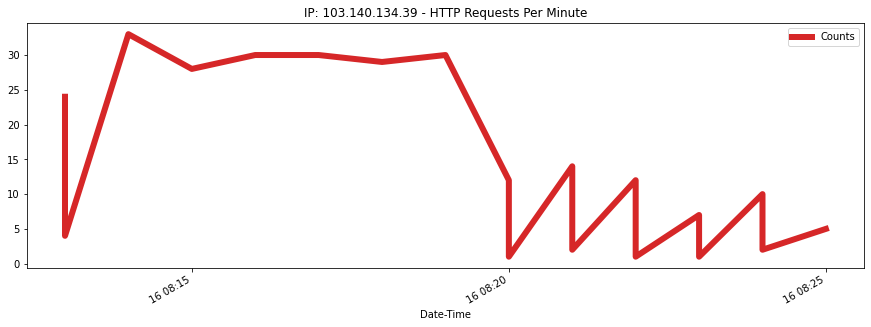

In [22]:
ipBar_2 = evidence.loc[evidence['Client IP'] == '103.140.134.39'].groupby(pd.Grouper(key='Date-Time', axis=0, freq='min'))['HTTP Method'].value_counts().reset_index(name='Counts') 
ipBar_2.plot(x='Date-Time' ,y='Counts',kind='line', figsize=(15,5), title="IP: 103.140.134.39 - HTTP Requests Per Minute", color="tab:red", linewidth=6.0)


---
<b>Observation: </b>From here it can be idenfified that <b>103.140.134.39</b> has been trying continuously to login to the account. From the fluctuations in the scatter chart it can be seen that this IP has been generating a lot of HTTP requests in a very small period of time. 

---

In [23]:
evidence.loc[evidence['Client IP'] == '195.212.74.214'].groupby(pd.Grouper(key='Date-Time', axis=0, 
                      freq='min'))['HTTP Method'].value_counts().reset_index(name='Counts').head(10)

,Date-Time,HTTP Method,Counts
0,2022-01-06 18:57:00,POST,20
1,2022-01-06 18:57:00,GET,2
2,2022-01-06 18:58:00,POST,33
3,2022-01-06 18:59:00,POST,30
4,2022-01-06 19:00:00,POST,27
5,2022-01-06 19:01:00,POST,27
6,2022-01-06 19:02:00,POST,26
7,2022-01-06 19:02:00,GET,6
8,2022-01-06 19:03:00,GET,14
9,2022-01-06 19:04:00,GET,8


<AxesSubplot:title={'center':'IP: 195.212.74.214 - HTTP Requests Per Minute'}, xlabel='Date-Time'>

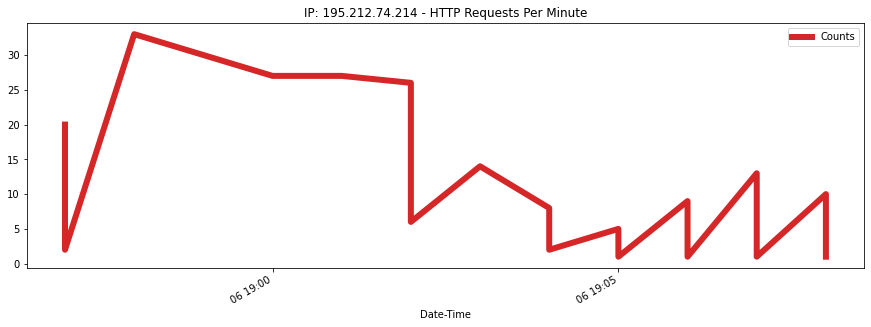

In [24]:
ipBar_3 = evidence.loc[evidence['Client IP'] == '195.212.74.214'].groupby(pd.Grouper(key='Date-Time', axis=0, freq='min'))['HTTP Method'].value_counts().reset_index(name='Counts') 
ipBar_3.plot(x='Date-Time' ,y='Counts',kind='line', figsize=(15,5), title="IP: 195.212.74.214 - HTTP Requests Per Minute", color="tab:red", linewidth=6.0)

---
<b>Observation: </b>From here it can be idenfified that <b>195.212.74.214</b> has been trying continuously to login to the account. From the fluctuations in the scatter chart it can be seen that this IP has been generating a lot of HTTP requests in a very small period of time. 

---

In [25]:
evidence.loc[evidence['Client IP'] == '64.225.172.42'].groupby(pd.Grouper(key='Date-Time', axis=0, 
                      freq='min'))['HTTP Method'].value_counts().reset_index(name='Counts').head(10)

,Date-Time,HTTP Method,Counts
0,2022-01-10 08:58:00,POST,30
1,2022-01-10 08:58:00,GET,3
2,2022-01-10 08:59:00,POST,31
3,2022-01-10 09:00:00,POST,29
4,2022-01-10 09:01:00,POST,29
5,2022-01-10 09:02:00,POST,28
6,2022-01-10 09:03:00,POST,16
7,2022-01-10 09:03:00,GET,2
8,2022-01-10 09:04:00,GET,8
9,2022-01-10 09:04:00,POST,1


<AxesSubplot:title={'center':'IP: 64.225.172.42 - HTTP Requests Per Minute'}, xlabel='Date-Time'>

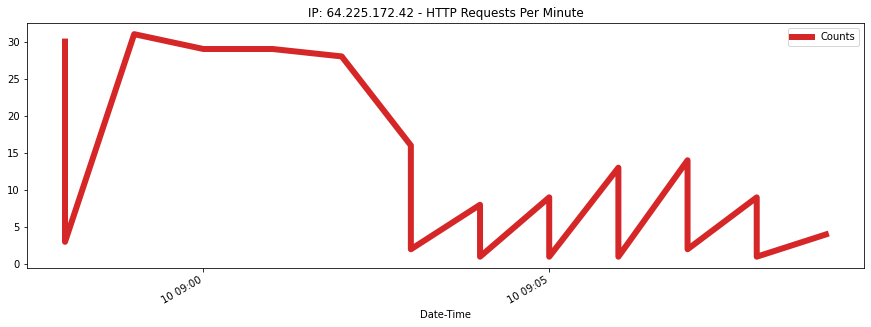

In [26]:
ipBar_4 = evidence.loc[evidence['Client IP'] == '64.225.172.42'].groupby(pd.Grouper(key='Date-Time', axis=0, freq='min'))['HTTP Method'].value_counts().reset_index(name='Counts') 
ipBar_4.plot(x='Date-Time' ,y='Counts',kind='line', figsize=(15,5), title="IP: 64.225.172.42 - HTTP Requests Per Minute", color="tab:red", linewidth=6.0)

<b>Observation: </b>From here it can be idenfified that <b>64.225.172.42</b> has been trying continuously to login to the account. From the fluctuations in the scatter chart it can be seen that this IP has been generating a lot of HTTP requests in a very small period of time. 

---

In [27]:
evidence.loc[evidence['Client IP'] == '46.102.116.177'].groupby(pd.Grouper(key='Date-Time', axis=0, 
                      freq='min'))['HTTP Method'].value_counts().reset_index(name='Counts').head(10)

,Date-Time,HTTP Method,Counts
0,2022-01-02 11:47:00,GET,10
1,2022-01-02 11:47:00,POST,1
2,2022-01-02 11:48:00,GET,18
3,2022-01-02 11:48:00,POST,3
4,2022-01-02 11:49:00,GET,8
5,2022-01-02 11:50:00,GET,9
6,2022-01-02 11:51:00,GET,3
7,2022-01-22 13:18:00,GET,12
8,2022-01-22 13:19:00,GET,8
9,2022-01-22 13:19:00,POST,1


<AxesSubplot:title={'center':'IP: 64.225.172.42 - HTTP Requests Per Minute'}, xlabel='Date-Time'>

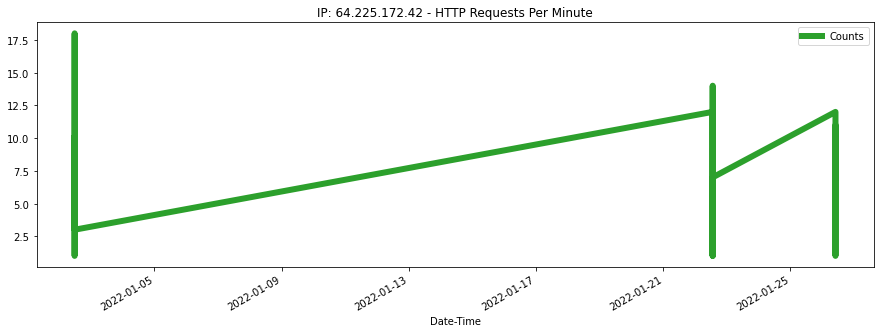

In [28]:
ipBar_5 = evidence.loc[evidence['Client IP'] == '46.102.116.177'].groupby(pd.Grouper(key='Date-Time', axis=0, freq='min'))['HTTP Method'].value_counts().reset_index(name='Counts') 
ipBar_5.plot(x='Date-Time' ,y='Counts',kind='line', figsize=(15,5), title="IP: 64.225.172.42 - HTTP Requests Per Minute", color="tab:green", linewidth=6.0)

In [29]:
evidence.loc[evidence['Client IP'] == '185.18.48.126'].groupby(pd.Grouper(key='Date-Time', axis=0, 
                      freq='min'))['HTTP Method'].value_counts().reset_index(name='Counts').head(10)

,Date-Time,HTTP Method,Counts
0,2022-01-24 10:54:00,GET,10
1,2022-01-24 10:54:00,POST,2
2,2022-01-24 10:55:00,GET,9
3,2022-01-24 10:55:00,POST,1
4,2022-01-24 10:56:00,GET,7
5,2022-01-24 10:56:00,POST,1
6,2022-01-24 10:57:00,GET,9
7,2022-01-24 10:58:00,GET,3
8,2022-01-26 07:07:00,GET,8
9,2022-01-26 07:08:00,GET,13


<AxesSubplot:title={'center':'IP: 185.18.48.126 - HTTP Requests Per Minute'}, xlabel='Date-Time'>

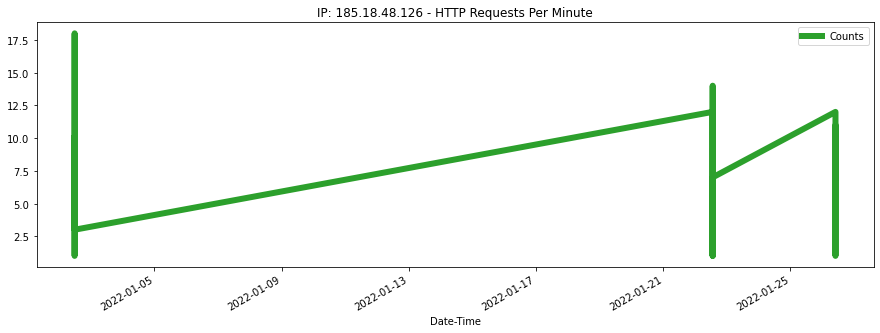

In [30]:
ipBar_5 = evidence.loc[evidence['Client IP'] == '46.102.116.177'].groupby(pd.Grouper(key='Date-Time', axis=0, freq='min'))['HTTP Method'].value_counts().reset_index(name='Counts') 
ipBar_5.plot(x='Date-Time' ,y='Counts',kind='line', figsize=(15,5), title="IP: 185.18.48.126 - HTTP Requests Per Minute", color="tab:green", linewidth=6.0)


<b>Observation: </b>Above analyzed two IPs show that the suspected 3 IPs have been doing malicious and suspicious activities. Also the scatter chart of these two IPs indicate a normal behaviour.

---



### Findings:
    1. There are 3 suspected IP addresses in the data set who have acted suspiciously. This decision has been made on the basis of Step 5, 9 and 10. From those steps it is clearly seen that the suspected IPs have been trying to unauthorizedly access the web server with password cracking attacks (such as- brute force attack).
    
    2. It is clearer after step 11 as it is found that suspected IPs have been trying to login, transfer and attempt or perform other transactions within a very short period of time. 
    
    3. For verification step 12 has been conducted. From where it is found that other IP addresses have been logging in normally and doing after login activites in a humanly order.
    
    4. For further concrete evidence step 13 has been performed from where it clearly indicates about the short duration in which the suspected IP addresses have been communicating so frequently with the server.
    
---

### Suspected IP List:

   1. 103.140.134.39
   2. 195.212.74.214
   3. 64.225.172.42
        
--- -------
    

### References

Whims, S. (2019) IIS Logging - Win32 apps docs.microsoft.com.23 August 2019 [online]. Available from: https://docs.microsoft.com/en-us/windows/win32/http/iis-logging [Accessed 12 March 2022].
Yu, H. (2022) HTTP status code overview - Internet Information Services docs.microsoft.com.24 March 2022 [online]. Available from: https://docs.microsoft.com/en-us/troubleshoot/developer/webapps/iis/www-administration-management/http-status-code [Accessed 11 May 2022].